In [173]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\pourt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Vectoriasation des textes du corpus à l'aide d'une approche "bag of words" 


In [175]:
def vectorisation_bag_of_words(corpus):
    """
    Vectorise un corpus de texte avec l'approche Bag of Words.

    Args:
    - corpus (list): Une liste de chaînes de texte.

    Returns:
    - tuple: (Matrice BoW, Liste des mots)
    """
    # Initialiser le CountVectorizer
    vectoriseur = CountVectorizer()

    # Appliquer le CountVectorizer sur le corpus
    matrice_bow = vectoriseur.fit_transform(corpus)

    # Liste des mots (caractéristiques)
    mots = vectoriseur.get_feature_names_out()

    return matrice_bow, mots

# Regrouper les textes d'un corpus en cluster


In [176]:
import pandas as pd
df_questions = pd.read_csv('C:\\Users\\pourt\\PythonPourLaDataScience\\Datascrapping\\data.csv', encoding='latin-1', sep='|')

liste=[]
for i in range(len(df_questions['question'])):
    x=type(df_questions['question'][i])
    if x!=str:
        liste.append((x,i))
print(liste)

print(len(df_questions['question']))

df_questions=df_questions.drop(159)

[]
1308


In [177]:
matrice_bow, mots = vectorisation_bag_of_words(df_questions['question'])

In [178]:
print(matrice_bow)

  (0, 3546)	1
  (0, 11330)	1
  (0, 9495)	1
  (0, 10044)	4
  (0, 10884)	1
  (0, 5060)	14
  (0, 1282)	1
  (0, 6941)	10
  (0, 9940)	10
  (0, 15973)	1
  (0, 1403)	1
  (0, 16295)	3
  (0, 16079)	1
  (0, 12189)	1
  (0, 5136)	9
  (0, 12265)	7
  (0, 3918)	1
  (0, 1829)	1
  (0, 3500)	4
  (0, 2653)	2
  (0, 1326)	2
  (0, 13786)	4
  (0, 10069)	14
  (0, 5415)	2
  (0, 10913)	1
  :	:
  (1306, 14602)	2
  (1306, 4247)	1
  (1306, 13616)	1
  (1306, 4845)	1
  (1306, 14084)	3
  (1306, 7060)	1
  (1306, 7493)	1
  (1306, 13748)	1
  (1306, 10008)	1
  (1306, 8047)	2
  (1306, 15381)	1
  (1306, 8248)	1
  (1306, 6351)	1
  (1306, 7605)	5
  (1306, 4975)	2
  (1306, 7042)	1
  (1306, 13575)	1
  (1306, 5572)	1
  (1306, 9939)	1
  (1306, 659)	1
  (1306, 9577)	1
  (1306, 10812)	2
  (1306, 7909)	1
  (1306, 10007)	1
  (1306, 7050)	1


In [179]:
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

def clustering_kmeans_lignes(matrice_sparse, nombre_clusters):
    """
    Effectue le clustering des lignes d'une matrice sparse avec la méthode des k-means.

    Args:
    - matrice_sparse (scipy.sparse.csr_matrix): Matrice sparse.
    - nombre_clusters (int): Nombre de clusters à former.

    Returns:
    - numpy.ndarray: Tableau des étiquettes de cluster pour chaque ligne.
    """
    if not isinstance(matrice_sparse, csr_matrix):
        raise ValueError("La matrice doit être au format csr_matrix.")


    # Appliquer la méthode des k-means
    kmeans = KMeans(n_clusters=nombre_clusters, random_state=42)
    etiquettes_clusters = kmeans.fit_predict(matrice_sparse)

    return etiquettes_clusters

# Analyse en composante principale et représentation graphique

In [180]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import pandas as pd

def pca_on_sparse_matrix(sparse_matrix, num_components=2):
    """
    Perform Principal Component Analysis (PCA) on a sparse matrix.

    Args:
    - sparse_matrix (scipy.sparse.csr_matrix): Sparse matrix representing a set of points.
    - num_components (int): Number of principal components to retain.

    Returns:
    - pd.DataFrame: Coordinates of the vectors in the new basis.
    - pd.DataFrame: Coordinates of the points projected onto the new basis.
    """
    if not isinstance(sparse_matrix, csr_matrix):
        raise ValueError("The matrix must be in csr_matrix format.")

    # Apply TruncatedSVD to perform PCA on the sparse matrix
    svd = TruncatedSVD(n_components=num_components)
    principal_components = svd.fit_transform(sparse_matrix)

    # Create a DataFrame for the coordinates of vectors in the new basis
    pc_columns = [f'PC{i}' for i in range(1, num_components + 1)]
    df_principal_components = pd.DataFrame(principal_components, columns=pc_columns)

    # Project the points onto the new basis
    projected_points = svd.inverse_transform(principal_components)

    # Create a DataFrame for the coordinates of the projected points
    df_projected_points = pd.DataFrame(projected_points)

    return df_principal_components, df_projected_points

# Example usage
# Suppose sparse_matrix is your sparse matrix
# and you want to retain 2 principal components
df_components, df_projection = pca_on_sparse_matrix(matrice_bow, num_components=2)
print("Coordinates of vectors in the new basis:\n", df_components)
print("\nCoordinates of the projected points in the new basis:\n", df_projection)

Coordinates of vectors in the new basis:
             PC1       PC2
0     26.430006 -9.269569
1     39.805763  1.539745
2     23.354800 -1.227017
3     26.473866 -0.959231
4     19.532394 -3.224354
...         ...       ...
1302  21.648908  2.147700
1303  32.310816 -3.495366
1304  23.315987  0.413286
1305  40.273624  2.790779
1306  59.827273  5.196209

[1307 rows x 2 columns]

Coordinates of the projected points in the new basis:
          0         1         2         3         4         5         6      \
0    -0.003016  0.190854 -0.001781  0.000925  0.000976 -0.000168 -0.000321   
1     0.003342  0.428265  0.001568  0.001520  0.000705  0.001183  0.002294   
2     0.000877  0.231916  0.000336  0.000875  0.000519  0.000497  0.000964   
3     0.001214  0.266810  0.000499  0.000995  0.000567  0.000603  0.001170   
4    -0.000384  0.173989 -0.000322  0.000713  0.000542  0.000212  0.000412   
...        ...       ...       ...       ...       ...       ...       ...   
1302  0.002484  0.2

In [181]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import pandas as pd

def pca_and_project_sparse_matrix(sparse_matrix, target_dimension=2):
    """
    Effectue une analyse en composantes principales (PCA) sur une matrice sparse.

    Args:
    - sparse_matrix (scipy.sparse.csr_matrix): Matrice sparse représentant un ensemble de points.
    - target_dimension (int): Dimension cible de la nouvelle base.

    Returns:
    - pd.DataFrame: Les coordonnées des vecteurs de la nouvelle base.
    - pd.DataFrame: Les coordonnées de la projection des points dans la nouvelle base de dimension réduite.
    """
    if not isinstance(sparse_matrix, csr_matrix):
        raise ValueError("La matrice doit être au format csr_matrix.")

    # Appliquer la méthode TruncatedSVD pour effectuer la PCA sur la matrice sparse
    svd = TruncatedSVD(n_components=target_dimension)
    principal_components = svd.fit_transform(sparse_matrix)

    # Créer un DataFrame pour les coordonnées des vecteurs de la nouvelle base
    pc_columns = [f'PC{i}' for i in range(1, target_dimension + 1)]
    df_principal_components = pd.DataFrame(principal_components, columns=pc_columns)

    # Projeter les points dans la nouvelle base de dimension réduite
    projected_points = svd.inverse_transform(principal_components)

    # Créer un DataFrame pour les coordonnées de la projection des points
    df_projected_points = pd.DataFrame(projected_points, index=sparse_matrix.index, columns=sparse_matrix.columns)

    return df_principal_components, df_projected_points

# Exemple d'utilisation
# Supposons que sparse_matrix soit votre matrice sparse
# et que vous souhaitez réduire la dimension à 2
#df_components, df_projection = pca_and_project_sparse_matrix(sparse_matrix, target_dimension=2)
#print("Coordonnées des vecteurs de la nouvelle base :\n", df_components)
#print("\nCoordonnées de la projection des points dans la nouvelle base de dimension réduite :\n", df_projection)

In [182]:
def pca_and_project_sparse_matrix(sparse_matrix, target_dimension=2):
    """
    Perform Principal Component Analysis (PCA) on a sparse matrix.

    Args:
    - sparse_matrix (scipy.sparse.csr_matrix): Sparse matrix representing a set of points.
    - target_dimension (int): Target dimension of the new basis.

    Returns:
    - pd.DataFrame: Coordinates of the vectors in the new basis.
    - pd.DataFrame: Coordinates of the projected points in the new basis of reduced dimension.
    """
    if not isinstance(sparse_matrix, csr_matrix):
        raise ValueError("The matrix must be in csr_matrix format.")

    # Apply TruncatedSVD to perform PCA on the sparse matrix
    svd = TruncatedSVD(n_components=target_dimension)
    principal_components = svd.fit_transform(sparse_matrix)

    # Create a DataFrame for the coordinates of vectors in the new basis
    pc_columns = [f'PC{i}' for i in range(1, target_dimension + 1)]
    df_principal_components = pd.DataFrame(principal_components, columns=pc_columns, index=sparse_matrix.indices)

    # Project the points into the new basis of reduced dimension
    projected_points = svd.inverse_transform(principal_components)

    # Create a DataFrame for the coordinates of the projected points
    df_projected_points = pd.DataFrame(projected_points, index=sparse_matrix.indices, columns=sparse_matrix.indices)

    return df_principal_components, df_projected_points

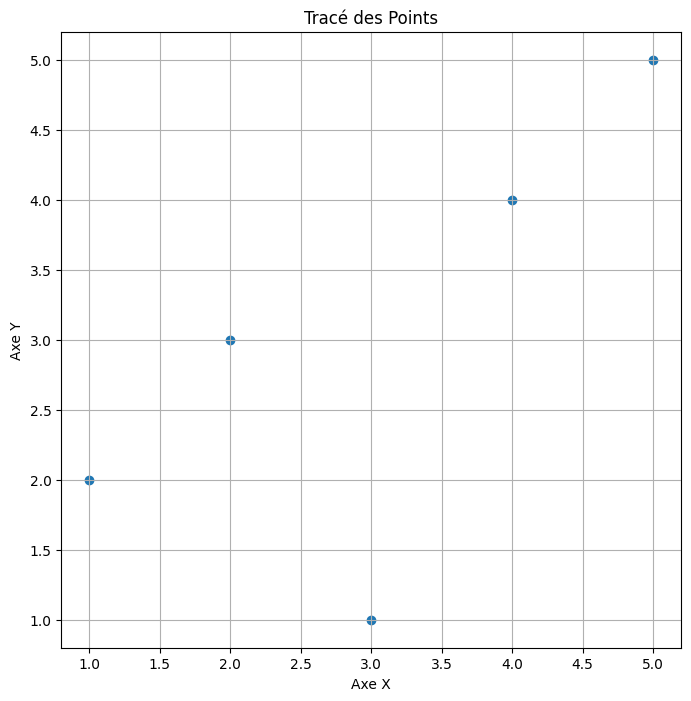

In [183]:
import matplotlib.pyplot as plt
import pandas as pd

def tracer_points(data_frame, label_col=None, title=None, xlabel=None, ylabel=None):
    """
    Trace les points d'un DataFrame à deux colonnes dans l'espace bidimensionnel.

    Args:
    - data_frame (pandas.DataFrame): DataFrame avec deux colonnes représentant les coordonnées des points.
    - label_col (str, optional): Nom de la colonne contenant les étiquettes (si disponible).
    - title (str, optional): Titre du graphique.
    - xlabel (str, optional): Libellé de l'axe des abscisses.
    - ylabel (str, optional): Libellé de l'axe des ordonnées.
    """
    plt.figure(figsize=(8, 8))

    if label_col is not None:
        labels = data_frame[label_col]
        scatter = plt.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1], c=labels, cmap='viridis', marker='o', colors="red")
        plt.legend(*scatter.legend_elements(), title=label_col)
    else:
        plt.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1], marker='o')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Exemple d'utilisation
# Supposons que df soit votre DataFrame avec deux colonnes de coordonnées (X et Y)
# et que vous souhaitez tracer les points
df = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [2, 3, 1, 4, 5]})
tracer_points(df, title='Tracé des Points', xlabel='Axe X', ylabel='Axe Y')

   X  Y
0 -1  2
1  2 -3
2  3  1
3 -4 -4
4  5  5


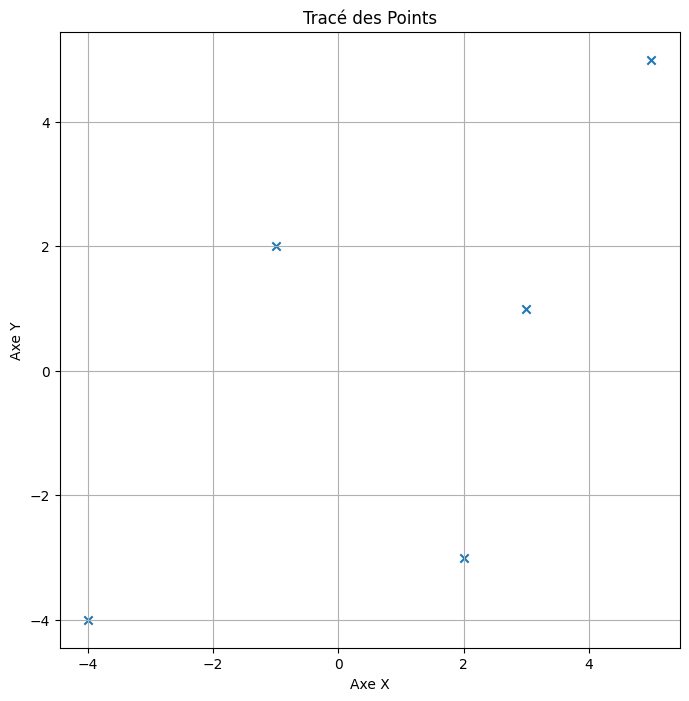

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

def tracer_points(data_frame, title=None, xlabel=None, ylabel=None):
    """
    Trace les points d'un DataFrame à deux colonnes dans l'espace bidimensionnel.

    Args:
    - data_frame (pandas.DataFrame): DataFrame avec deux colonnes représentant les coordonnées des points.
    - title (str, optional): Titre du graphique.
    - xlabel (str, optional): Libellé de l'axe des abscisses.
    - ylabel (str, optional): Libellé de l'axe des ordonnées.
    """
    plt.figure(figsize=(8, 8))

    plt.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1], marker='x')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Ajuster automatiquement l'échelle de l'axe en fonction des points
    plt.axis('auto')
    
    plt.grid(True)
    plt.show()

# Exemple d'utilisation
# Supposons que df soit votre DataFrame avec deux colonnes de coordonnées (X et Y)
# et que vous souhaitez tracer les points
df = pd.DataFrame({'X': [-1, 2, 3, -4, 5], 'Y': [2, -3, 1, -4, 5]})
print(df)
tracer_points(df, title='Tracé des Points', xlabel='Axe X', ylabel='Axe Y')

# Illustration et test de nos fonction sur un corpus très simple 

In [185]:
corpus_exemple_simple = ["Ceci est le premier document.", "Et voici le troisième document.","Est-ce que ce texte est très différent?" "Nous sommes allés en soirée Lundi.","J'aime bien les frites","on essaye avec un quatrième document"]
#On crée un corpus de texte très simple avec 6 texte qu'on classe intuitivement en deux groupes très homogènes.

In [186]:
matrice_bow, mots = vectorisation_bag_of_words(corpus_exemple_simple)
print("On obtient la matrice suivante :")
print(matrice_bow.toarray())
print(mots)


On obtient la matrice suivante :
[[0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 2 0 1 0 1 0 2 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]]
['aime' 'allés' 'avec' 'bien' 'ce' 'ceci' 'différent' 'document' 'en'
 'essaye' 'est' 'et' 'frites' 'le' 'les' 'lundi' 'nous' 'on' 'premier'
 'quatrième' 'que' 'soirée' 'sommes' 'texte' 'troisième' 'très' 'un'
 'voici']


In [187]:
etiquettes_clusters_lignes = clustering_kmeans_lignes(matrice_bow, 2)
print("Étiquettes des clusters pour les différents texte du corpus :", etiquettes_clusters_lignes)

Étiquettes des clusters pour les différents texte du corpus : [1 1 0 1 1]


C:\Users\pourt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coordinates of vectors in the new basis:
             PC1           PC2
0  6.552556e-01  1.513581e+00
1  1.030887e-01  1.636224e+00
2  4.226850e+00 -2.990129e-01
3 -8.309585e-16  5.076095e-17
4  6.160370e-02  1.678865e+00

Coordinates of the projected points in the new basis:
              0             1             2             3             4   \
0 -2.091886e-16  9.380282e-02  3.248365e-01 -8.614794e-17  1.876056e-01   
1 -1.040641e-16 -3.832027e-02  3.491211e-01  3.382910e-17 -7.664053e-02   
2 -8.372927e-16  9.871147e-01 -4.951587e-02 -8.967430e-16  1.974229e+00   
3  1.650121e-31 -1.937528e-16  8.024365e-18  1.760193e-31 -3.875056e-16   
4 -9.786715e-17 -4.951587e-02  3.580709e-01  4.397599e-17 -9.903174e-02   

             5             6             7             8             9   ...  \
0  3.143182e-01  9.380282e-02  9.572813e-01  9.380282e-02  3.248365e-01  ...   
1  3.181266e-01 -3.832027e-02  1.007744e+00 -3.832027e-02  3.491211e-01  ...   
2  9.380282e-02  9.871147e-01  

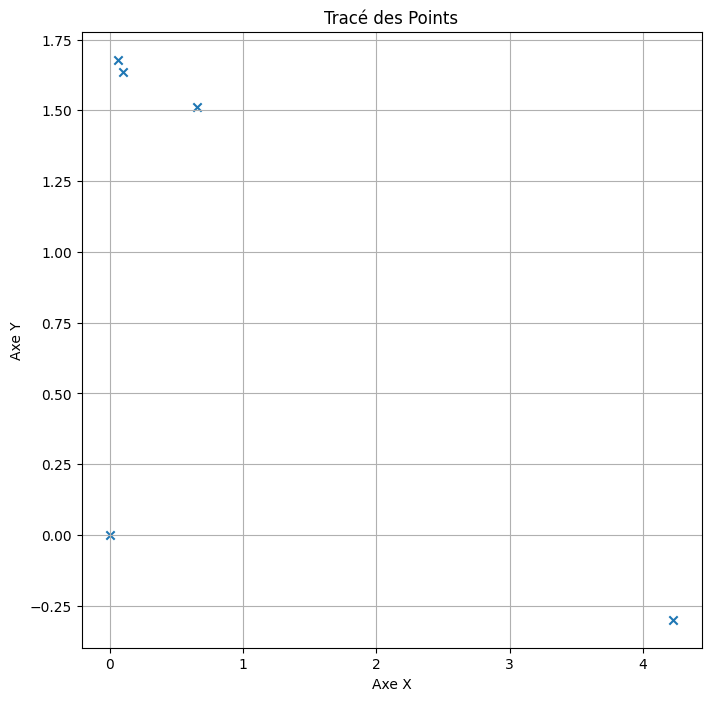

5


In [188]:
df_components, df_projection = pca_on_sparse_matrix(matrice_bow, num_components=2)
#df_components, df_projection =pca_and_project_sparse_matrix(matrice_bow, target_dimension=2)
print("Coordinates of vectors in the new basis:\n", df_components)
print("\nCoordinates of the projected points in the new basis:\n", df_projection)
tracer_points(df_components, title='Tracé des Points', xlabel='Axe X', ylabel='Axe Y')
print(len(df_projection))

# Analyse du corpus des questions à l'Assemblée nationale 

On importe le corpus sous la forme d'un DataFrame panda.

In [189]:
import pandas as pd
df_questions = pd.read_csv('C:\\Users\\pourt\\PythonPourLaDataScience\\Datascrapping\\data.csv', encoding='latin-1', sep='|')
print(df_questions.head)

liste=[]
for i in range(len(df_questions['question'])):
    x=type(df_questions['question'][i])
    if x!=str:
        liste.append((x,i))
print(liste)

print(len(df_questions['question']))

#df_questions=df_questions.drop(159)

<bound method NDFrame.head of         id                                            groupe  \
0        1  Libertés, Indépendants, Outre-mer et Territoires   
1        2                                  Les Républicains   
2        3                 Démocrate (MoDem et Indépendants)   
3        4                                       Renaissance   
4        5  Libertés, Indépendants, Outre-mer et Territoires   
...    ...                                               ...   
1303  1304                                       Renaissance   
1304  1305                            Horizons et apparentés   
1305  1306                 Démocrate (MoDem et Indépendants)   
1306  1307                                       Renaissance   
1307  1308                                Écologiste - NUPES   

                          nom  \
0      M. Christophe Naegelen   
1           M. Pierre Cordier   
2           M. Frédéric Petit   
3     Mme Marie-Pierre Rixain   
4      M. Christophe Naegelen   
...

Ensuite, on vectorise les textes du corpus à l'aide de la fonction écrite précedemment.

In [190]:
matrice_bow, mots = vectorisation_bag_of_words(df_questions['question'])

Nous regroupons les textes en cluster

In [191]:
etiquettes_clusters_lignes = clustering_kmeans_lignes(matrice_bow, 11)
print("Étiquettes des clusters pour les différents texte du corpus :", etiquettes_clusters_lignes)

C:\Users\pourt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Étiquettes des clusters pour les différents texte du corpus : [8 4 7 ... 8 4 6]


In [192]:
def thematique_cluster(df,liste_etiquette_cluster,indice_cluster):
    liste_thematique=[]
    for i in range(len(liste_etiquette_cluster)):
        if liste_etiquette_cluster[i]==indice_cluster:
            liste_thematique.append(df["rubrique"][i])
    return liste_thematique

In [193]:
print(thematique_cluster(df_questions,etiquettes_clusters_lignes,0))

['fonctionnaires et agents publics', 'fonctionnaires et agents publics', 'fonctionnaires et agents publics', 'enseignement supérieur', 'fonctionnaires et agents publics', 'fonctionnaires et agents publics', 'enseignement', 'fonctionnaires et agents publics', 'enseignement', 'fonctionnaires et agents publics', 'fonctionnaires et agents publics']


In [194]:
def groupe_cluster(df,liste_etiquette_cluster,indice_cluster):
    liste_groupes=[]
    for i in range(len(liste_etiquette_cluster)):
        if liste_etiquette_cluster[i]==indice_cluster:
            liste_groupes.append(df["groupe"][i])
    return liste_groupes

In [195]:
print(groupe_cluster(df_questions,etiquettes_clusters_lignes,1))

['Renaissance', 'Libertés, Indépendants, Outre-mer et Territoires', 'Libertés, Indépendants, Outre-mer et Territoires', 'Renaissance', 'Écologiste - NUPES', 'Rassemblement National', 'Renaissance', 'Libertés, Indépendants, Outre-mer et Territoires', 'La France insoumise - Nouvelle Union Populaire écologique et sociale', 'Démocrate (MoDem et Indépendants)', 'Renaissance', 'Démocrate (MoDem et Indépendants)', 'Les Républicains', 'Rassemblement National', 'Les Républicains', 'Les Républicains', 'Gauche démocrate et républicaine - NUPES', 'Renaissance', 'Les Républicains', 'Les Républicains', 'Rassemblement National', 'Les Républicains', 'La France insoumise - Nouvelle Union Populaire écologique et sociale', 'Écologiste - NUPES', 'Rassemblement National', 'Gauche démocrate et républicaine - NUPES', 'Rassemblement National', 'Les Républicains', 'Renaissance', 'Les Républicains', 'Horizons et apparentés', 'Les Républicains', 'Démocrate (MoDem et Indépendants)', 'Démocrate (MoDem et Indépenda

In [196]:
def homogeneite_cluster(df,variable,valeur_variable,liste_etiquette_cluster,nb_clusters):
    apparitions_par_cluster=[0 for i in range(nb_clusters)]
    for i in range(len(liste_etiquette_cluster)):
        if df[variable][i]==valeur_variable:
            apparitions_par_cluster[liste_etiquette_cluster[i]]+=1
    return apparitions_par_cluster

In [197]:
homogeneite_cluster(df_questions,'groupe','La France insoumise - Nouvelle Union Populaire écologique et sociale',etiquettes_clusters_lignes,11)

[0, 14, 21, 6, 21, 11, 17, 16, 29, 17, 1]

In [198]:

glove_model = gensim.downloader.load('glove-wiki-gigaword-200')

# Vectorisation avec une méthode de word embedding


In [199]:
!pip install spacy gensim sentence_transformers pandas matplotlib seaborn

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Obtaining dependency information for thinc<8.3.0,>=8.1.8 from https://files.pythonhosted.org/packages/74/24/564a7df5b1fac0520f6b55137deea2cc0b6f7d6e66228f1645dbfd59bb33/thinc-8.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached thinc-8.2.2-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for weasel<0.4.0,>=0.1.0 from https://files.pythonhosted.org/packages/d5/e5/b63b8e255d89ba4155972990d42523251d4d1368c4906c646597f63870e2/weasel-0.3.4-py3-none-any.whl.metadata
  Using cached weasel-0.3.4-py3-none-any.whl.metadata (4.7 kB)
  Obtaining dependency information for transformers<5.0.0,>=4.6.0 from https://files.pythonhosted.org/pa

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\pourt\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\transformers\\models\\deprecated\\trajectory_transformer\\convert_trajectory_transformer_original_pytorch_checkpoint_to_pytorch.py'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\pourt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [200]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_score

from gensim.models.word2vec import Word2Vec
import gensim.downloader


In [201]:
glove_model = gensim.downloader.load('glove-wiki-gigaword-200')

In [202]:
glove_model['king']

array([-0.49346  , -0.14768  ,  0.32166  ,  0.056899 ,  0.052572 ,
        0.20192  , -0.13506  , -0.030793 ,  0.15614  , -0.23004  ,
       -0.66376  , -0.27316  ,  0.10391  ,  0.57334  , -0.032355 ,
       -0.32766  , -0.2716   ,  0.32919  ,  0.41305  , -0.18085  ,
        1.5167   ,  2.1649   , -0.10278  ,  0.098019 , -0.018946 ,
        0.027292 , -0.7948   ,  0.36631  , -0.33151  ,  0.2884   ,
        0.10436  , -0.19166  ,  0.27326  , -0.17519  , -0.14986  ,
       -0.072333 , -0.54371  , -0.29728  ,  0.081491 , -0.42673  ,
       -0.36406  , -0.52035  ,  0.18455  ,  0.44121  , -0.32196  ,
        0.39172  ,  0.11952  ,  0.36979  ,  0.29229  , -0.42954  ,
        0.46653  , -0.067243 ,  0.31216  , -0.17216  ,  0.48874  ,
        0.2803   , -0.17577  , -0.35101  ,  0.020792 ,  0.15974  ,
        0.21927  , -0.32499  ,  0.086022 ,  0.38927  , -0.65638  ,
       -0.67401  , -0.41896  ,  1.2709   ,  0.20857  ,  0.28315  ,
        0.58238  , -0.14944  ,  0.3989   ,  0.52681  ,  0.3571

In [203]:
glove_model.most_similar('mother')

[('daughter', 0.8648022413253784),
 ('wife', 0.8568021655082703),
 ('grandmother', 0.8373793363571167),
 ('husband', 0.8055646419525146),
 ('sister', 0.8029242157936096),
 ('father', 0.7936768531799316),
 ('her', 0.783749520778656),
 ('daughters', 0.7589756846427917),
 ('woman', 0.7579867243766785),
 ('she', 0.7452898025512695)]

In [204]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd

def vectoriser_corpus_glove(data_frame, texte_colonne, modele_glove, vectoriser_colonnes=None):
    """
    Vectorise un corpus de texte avec le modèle GloVe de Gensim.

    Args:
    - data_frame (pandas.DataFrame): DataFrame contenant les textes à vectoriser.
    - texte_colonne (str): Nom de la colonne contenant les textes.
    - chemin_modele_glove (str): Chemin vers le fichier du modèle GloVe.
    - vectoriser_colonnes (list, optional): Liste des colonnes supplémentaires à conserver dans le DataFrame résultant.

    Returns:
    - pandas.DataFrame: DataFrame contenant les vecteurs de chaque texte.
    """

    # Fonction pour obtenir le vecteur moyen d'un texte
    def obtenir_vecteur(texte):
        mots = texte.split()
        # Filtrer les mots présents dans le modèle GloVe
        mots_dans_modele = [mot for mot in mots if mot in model_glove]
        # Calculer le vecteur moyen des mots
        vecteur_moyen = np.mean([model_glove[mot] for mot in mots_dans_modele], axis=0)
        return vecteur_moyen

    # Appliquer la fonction sur chaque texte de la colonne spécifiée
    data_frame['vecteur'] = data_frame[texte_colonne].apply(obtenir_vecteur)

    # Créer un DataFrame résultant avec les vecteurs
    if vectoriser_colonnes:
        resultat = pd.concat([data_frame[vectoriser_colonnes], pd.DataFrame(data_frame['vecteur'].to_list())], axis=1)
    else:
        resultat = pd.DataFrame(data_frame['vecteur'].to_list())

    return resultat


In [205]:
def fonction(x):
    return x**2